<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/labs/RaytaCopy_titanictree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


# 1 reading data from kaggle

In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


# create a file kaggle.json by requesting and API key to kaggle (under account)
# https://www.kaggle.com/docs/api
# and upload it to your google drive (manuallym outside of the notebook). Upload it to the general drive foloder and make sure it is still called kaggle.json

Change the permission on the file so that it is secure and cannot be seen used others. The update the environmental variables KAGGLE_USERNAME and KAGGLE_KEY based on the values on the file

In [ ]:
ls kaggle.json

kaggle.json


In [ ]:
!chmod 600 kaggle.json

In [ ]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           8890  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           9836  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           4158  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           5193  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [ ]:
cd dsps

/content/gdrive/My Drive/dsps


In [ ]:
#create a directory for these data
!mkdir kaggleTitanic

In [ ]:
#move to that directory
cd kaggleTitanic

/content/gdrive/My Drive/dsps/kaggleTitanic


download the titanic data into the directory you created for it

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.04MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 7.59MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 747kB/s]


In [ ]:
!ls

gender_submission.csv  test.csv  train.csv


read in the data

In [ ]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [ ]:
titanic.shape

(714, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2 data cleaning and wrangling

### turn gender into numeric

In [ ]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

### throw away data that you will not use

In [ ]:
titanic_short = titanic[["Pclass", "gender", "Age"]].dropna()


In [ ]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [ ]:
titanic[["Survived"]].values.shape, titanic_short.shape

((714, 1), (714, 3))

# 3 test the purity of various splits
## first split

### split by gender

In [ ]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [ ]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 /
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [ ]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [ ]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [ ]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [ ]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [ ]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [ ]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 /
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [ ]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) &
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [ ]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 0) &
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [ ]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),

       ((titanic_short.gender.values == 1) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [ ]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is
## - for females by travel class
## - for males by age

# 4 actually run a tree model

In [ ]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(titanic_short.values,
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

# 5 create the dendrogram viz

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns,
                                out_file=None)
graph = graphviz.Source(dot_data)

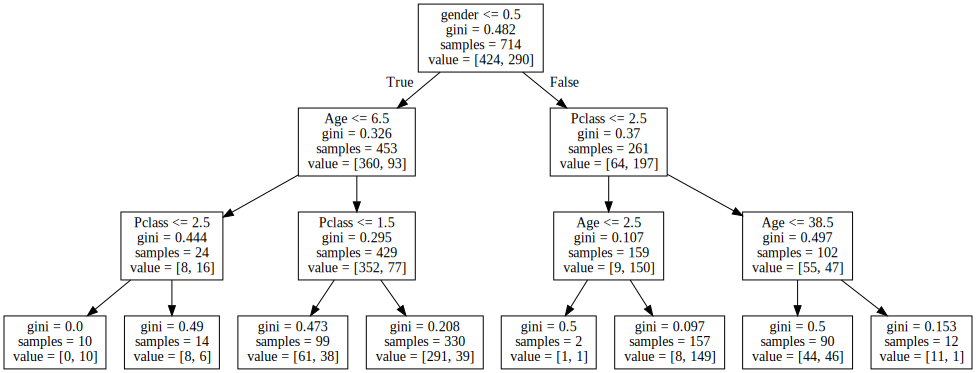

In [ ]:
graph

In [ ]:
graph.render("TitanicTree")

'TitanicTree.pdf'

# 6 run ensamble method:
## changing model to Random Forest

In [ ]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini",
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


changing max depth

In [ ]:
rf =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", n_estimators=100,
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


In [ ]:
rf =  ensemble.RandomForestClassifier(criterion="gini", max_depth=None, n_estimators=100,
                                       random_state=222).fit(titanic_short.values,
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.90


## changing model to Gradient Boosted Trees

In [ ]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=4,
                                           random_state=222).fit(titanic_short.values,
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_short.values, titanic["Survived"]))

score 0.89


# 7 feature importance

In [ ]:
print("Random Forest feature importance")
for f,fi in zip (titanic_short.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
Pclass 0.19
gender 0.35
Age 0.46


In [ ]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip (titanic_short.columns, gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Pclass 0.23
gender 0.47
Age 0.3


## calculate feasture importance uncertainties for RF method

In [ ]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.19 +/- 0.04
gender 0.35 +/- 0.05
Age 0.46 +/- 0.05


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


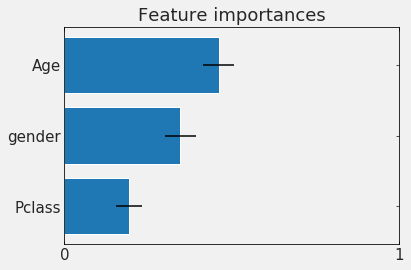

In [ ]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]),
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]),
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()


## Is the feature importance consistent between the 2 methods?

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    pl.imshow(cm, cmap="bone")
    pl.title(title)
    pl.colorbar()
    pl.axis('off')

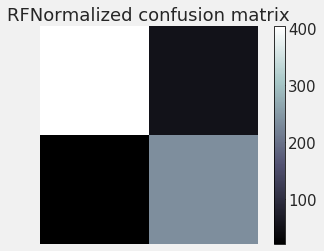

In [ ]:
plot_confusion_matrix(rf.predict(titanic_short),
                      titanic["Survived"],
                      title="RF ")

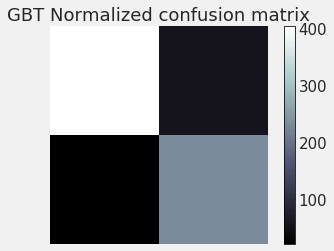

In [ ]:
plot_confusion_matrix(gbt.predict(titanic_short),
                      titanic["Survived"], title="GBT ")